<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/2021/MachineLearning/word_embeddings_simpleAnalogiesWithFastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving analogies with FastText

In this section, we'll show how computers can learn analogies. For example,

$$
\textrm{France is to Paris as Italy is to _______ ?}
$$

Paris is the capital of France, so this analogy is asking what the capital of Italy is. The answer is [Rome](https://www.britannica.com/place/Rome), of course! But we know this because of geography class. Can a computer learn this on its own? If so, what else can it learn? What will it have difficulty learning?

To explore these questions, we'll use some pre-trained vectors from [fastText](https://fasttext.cc/), which was created by Facebook's Artificial Intelligence Lab. The goal of this project is to turn words into mathematical objects and see if mathematical relations can be used as a way to understand language.

Let's begin by importing the necessary functions. The FastText_helpers file was taken from [this article](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519) to aid this analysis. You can take a closer look at this file to better understand the math behind this section if you're interested.

In [ ]:
# If using Google Colab, we need to get some helper files
! wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/nlp/FastText_helpers.py
! wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/nlp/load.py
! wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/nlp/main.py
! wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/nlp/vectors.py
! wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/nlp/word.py

In [2]:
import numpy as np
from typing import List
import vectors as v
from vectors import Vector
import FastText_helpers as ft
from load import load_words
import math
import matplotlib.pyplot as plt

In this section, we will treat words as vectors, or a list of numbers. We won't go into the details of how these vectors are created for each word (that is what fastText does), but we will show how we can use these vectors to understand language better. Run the following cell to load in the words we'll use (97,193 words, to be exact) and their vectors.

In [ ]:
# First, download the data. It's a bit large but not crazy: 650 MB or so (when compressed)
# You may want to NOT do this, execute the next cell instead (for a smaller dataset)
! wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
big_file = True

In [ ]:
# or, download a subset of the data, which will make downloads and computing faster
#! wget https://drive.google.com/file/d/1WCHFVHun6sF0_xI4PD1YBSnI4NVYFS5F/view?usp=sharing # Stephen uploaded to his google drive
#!export FILEID=1WCHFVHun6sF0_xI4PD1YBSnI4NVYFS5F
#!export FILENAME=wiki-news-300d-100k.vec
# see https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=${FILEID}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=${FILEID}" -O ${FILENAME} && rm -rf /tmp/cookies.txt
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WCHFVHun6sF0_xI4PD1YBSnI4NVYFS5F' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WCHFVHun6sF0_xI4PD1YBSnI4NVYFS5F" -O wiki-news-300d-100k.vec && rm -rf /tmp/cookies.txt
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=${FILEID}' -O ${FILENAME}
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WCHFVHun6sF0_xI4PD1YBSnI4NVYFS5F' -O wiki-news-300d-100k.vec

# Instead, try this: (see https://stackoverflow.com/a/50670037)
!pip install gdown
!gdown https://drive.google.com/uc?id=1WCHFVHun6sF0_xI4PD1YBSnI4NVYFS5F
big_file = False

In [ ]:
# Extract the zip file (now 2.2 GB)
if big_file == True:
  !unzip wiki-news-300d-1M.vec.zip

In [4]:
# And load the data into our python session
if big_file == True:
  print("Loading big 2.2 GB file")
  words = load_words('wiki-news-300d-1M.vec')
else:
  print("Loading medium 216 MB file")
  words = load_words('wiki-news-300d-100k.vec') 
  #words = load_words('/data/FastText/wiki-news-300d-100k.vec')  # old location

Loading medium 216 MB file
Loading wiki-news-300d-100k.vec...
Loaded 100000 words.
Removed stop words, 98650 remain.
Removed duplicates, 97192 remain.


Now that we have our data loaded to memory with the variable `words`, let's take a closer look at what the data looks like. We can look at a word by typing `words[k]` for some number, $k$, between 0 and 97191. This will return the $\textrm{k}^{\textrm{th}}$ word, along with its associated vector. The access just the word, type `word[k].text` and to access the vector, type `word[k].vector` 

You can also search the "word" variable to see if it has a certain word using the `ft.find_word(words,str)` command. If the string is in words, then it will return the word, if not it will let us know that that word wasn't found.

**Q**: How long of a vector is used for each word?

**Q**: Find the vector for the word "Paris". Is it the same vector used for "paris"?

In [ ]:

### TODO : find the length of a vector for each word in our "words" list


### TODO : find the vectors that corresponds to the words "Paris" and "paris". Are they the same?
# You may wish to use the vector functions, e.g., v.dot(x,y),  v.normalize(x), v.cosine_similarity_normalized(x,y)
# or the FastText_helpers (imported as ft)
dir(ft)  # shows you available commands

We can visualize some of these vectors by plotting the first two entries of the 300-length array. Let's see what this looks like.

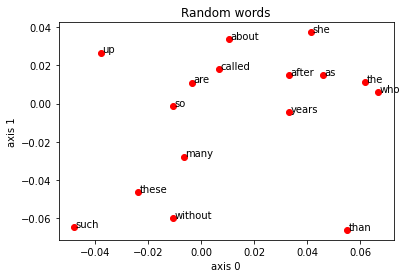

In [5]:
# using PCA is a common alternative to reduce dimensions
#  as well as tSNE
for i in range(0,151,10):
    x,y = words[i].vector[0:2]
    wordtext = words[i].text
    plt.scatter(x,y,c="red")
    plt.annotate(wordtext,xy=(x,y),xytext=(x+.0005,y))
    plt.xlabel("axis 0")
    plt.ylabel("axis 1")
    plt.title("Random words")

Note that these are only 2 of the 300 dimensions of our vector, so it's not a perfect representation of our words.

**Q**: Do you see any patterns among clusters of words?

To get a better sense of how similar two words are, we have the function called `ft.cosine_similarity(vector1,vector2)`. The [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity#Definition) finds the angle between the vectors for two words and determines how similar they are (it returns $1$ if they are very similar and $-1$ if they are not very similar). The following code will compute the similarity between two words given by you! Try out some pairs!

**Q**: What is the cosine similarity between any word and itself?

**Q**: Do opposites (for example: hot and cold, or rich and poor) have high or low cosine similarities? Does your answer surprise you?

**Q**: The cosine similarity looks at the angle between two vectors. Are there any other ways in which we could compare two vectors? Try your own method of comparison below!

In [ ]:
word1 = "Italy";#### insert word here
word2 = "France";#### insert word here

word1_w = ft.find_word(words,word1) ###Find these words in our list of words
word2_w = ft.find_word(words,word2)

#compute the similarity between these words
similarity = ft.cosine_similarity(word1_w.vector,word2_w.vector)

print("The cosine similarity between these two words is " + str(similarity))

#Compute your own similarity method
#similarity_2 = ...
#print("My own similarity measure between these two words is " + str(similarity_2))

The cosine similarity between these two words is 0.7184823438635273


Now we have a way to describe how similar any two words are. A natural next question is how we can find the words closest to any particular word? We can do this with the `ft.print_related(words,word)` function, which takes the given word, compares it to all words in our list, and finds which have the highest level of cosine similarity. 

**Q**: Which words are most similar to the following words: "president","Italy","pizza",,"sew","sewer". Do any of these so-called similar words surprise you?

**Q**: Look for the words similar to "principle". Did you find the similar words you were expecting? Why or why not?

In [ ]:
ft.print_related(words,"Italy")

# Brother - Sister = gender,    Brother + gender = sister
# King - Queen = Brother - Sister
# King - Queen + Sister = ... ? (Brother?)     King + gender = Queen

Rome, Tuscany, France, Sicily, Germany, Naples, Italian


Now we're ready to start solving analogies!!! Let's return to our original question, 

$$
\textrm{France is to Paris as Italy is to _______ ?}
$$

Recall that now, we are thinking about these words as points in space and not as countries and their capitals. It turns out that in this way, we can assume these words have a simple relation to solve the analogy. Breaking our vectors into $(x,y)$ points, we may assume they look something like this (run the following cell):

In [ ]:
pt_matrix = [[0,0],[1,2],[2,0],[3,2]]
word_list = ["Paris","France","Italy's capital","Italy"]
for i in range(0,4):
    x,y = pt_matrix[i]
    plt.scatter(x,y,c=["red" if i<2 else "green"])
    plt.annotate(word_list[i],xy=(x,y),xytext=(x+.07,y),fontsize=14)
    if i%2==0:
        plt.arrow(x,y,.975,1.95,color="black",lw = 2,head_width = .05,
          length_includes_head=True)
        
plt.xlim((-.25,3.5))

If this schematic of the relation between countries and their capitals is true, then the vectors connecting them should be indentical! This would suggest we have the relation:

$$
\textrm{France - Paris} \approx \textrm{Italy - Italy's capital.}
$$

(Remember that we are thinking of these words as vectors with FastText, so it makes sense to add and subtract words). So, if we want to know the capital of Italy, we can assume:

$$
\textrm{Italy's capital} \approx  \textrm{Italy - France + Paris}
$$

More generally, we can think

$$
\textrm{Capital city 2} \approx  \textrm{Country 2 - Country 1 + Capital city 1}
$$

So now to use FastText to try and answer our analogy, we can look for the word whose is vector closest to the vector given by Italy - France + Paris. This is exactly what the function `ft.print_analogies(left2,left1,right2,words)` does: it loops through each vector in our list and determines which word is closest to the above sum. Does it predict the capital of Italy?

**Q**: Using France and Paris as our analogy, what other capital cities can FastText predict (You can find a list of capitals [here](https://www.thoughtco.com/capitals-of-every-independent-country-1434452)). What countries does fastText have trouble predicting? What trends do you notice when the wrong capital cities are predicted?

In [ ]:
ft.print_analogy("France","Paris","Ecuador",words)

notes: Fasttext (as is) cannot predict the capitals of:
 Cambodia, Canada, Mexico, USA, and many others

Let's explore some more analogies and how well fastText has learned them:

Let's start with some plurals: If we provide the singular-plural versions of a word, such as horse and horses, what are some words whose plurals we can learn? 

**Q**: Plural words are one of the subtleties of the English language. Usually, we only need to add an "s" to the end of the word to get its plural. Can fastText understand that some words have different forms of plurals?

In [ ]:
to_compare = ["goose","cactus","bacterium","child","foot","man","mouse","woman"]

for word_comp in to_compare:
    ft.print_analogy("horse","horses",word_comp,words)

What about opposites? Can Fasttext predict opposite words if it's given an example?

In [ ]:
to_compare = ["hot","rich","old","fun","boring","boy","easy"]

for word_comp in to_compare:
    ft.print_analogy("good","bad",word_comp,words)

Can you come up with some analogies on your own to test fastText with??